#### CS166 Pre-class Work for Session 10.2:

### Probability Distributions and Sampling

_Yoav Rabinovich, March 2019_

__________________________

#### Shonkwiler Exercise 2.14: Sampling bias for bus waiting times

*Suppose the interarrival time
for a city bus has an exponential distribution with parameter 1/λ. A passenger
arrives at a uniformly random time and records the time until the
next bus arrives. What is the expected waiting time? Use a simulation to
get an answer. Is the answer surprising? Now suppose instead that the
interarrival time is U(0, 2λ). How does this change the situation? (Notice
that the expected interarrival time is λ in both cases.)*



Since the exponential distribution is memoryless, the passenger's arrival time doesn't factor in and the expected arrival time is the mean of the distribution, 1/λ.  This is confirmed by my simulation below.

For a uniform distribution, the passenger's wait time is a difference between two independent variables from uniform distributions, buss arrival and passenger arrival. According to the simulation below, the wait time corresponds to 2λ/3.

In [0]:
import numpy as np

trials = 100000
busses= 100000
lamb = 1

interarrival_times_exp = np.cumsum(np.random.exponential(1/lamb,busses))
observed_times_exp = []
for i in range(trials):
    passenger_arrival_time = np.random.uniform(0, interarrival_times_exp[-1])
    arrived_after = interarrival_times_exp.searchsorted(passenger_arrival_time)
    wait_time = interarrival_times_exp[arrived_after]-passenger_arrival_time
    observed_times_exp.append(wait_time)
    
print("Average wait time with exponential distribution: "+str(np.mean(observed_times_exp)))

interarrival_times_uni = np.cumsum(np.random.uniform(0,2*lamb,busses))
observed_times_uni = []
for i in range(trials):
    passenger_arrival_time = np.random.uniform(0, interarrival_times_uni[-1])
    arrived_after = interarrival_times_uni.searchsorted(passenger_arrival_time)
    wait_time = interarrival_times_uni[arrived_after]-passenger_arrival_time
    observed_times_uni.append(wait_time)
    
print("Average wait time with uniform distribution: "+str(np.mean(observed_times_uni)))

Average wait time with exponential distribution: 0.9951413753393156
Average wait time with uniform distribution: 0.663150510036344


#### Shonkweiler Exercise 2.24: Retirement benefit projection

*At age 50 Fannie Mae has \$150,000
invested and will be investing another \$10,000 per year until age 70. Each
year the investment grows according to an interest rate that is normally
distributed with mean 8% and standard deviation 9%. At age 70, Fannie
Mae then retires and withdraws $65,000 per year until death. Below is
given a conditional death probability table. Thus if Fannie Mae lives until
age 70, then the probability of dying before age 71 is 0.04979. Simulate
this process 1000 times and histogram the amount of money Fannie Mae
has at death.*

In [0]:
data = {
50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.0inv6812,
75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
104: 0.96000, 105: 1.00000}

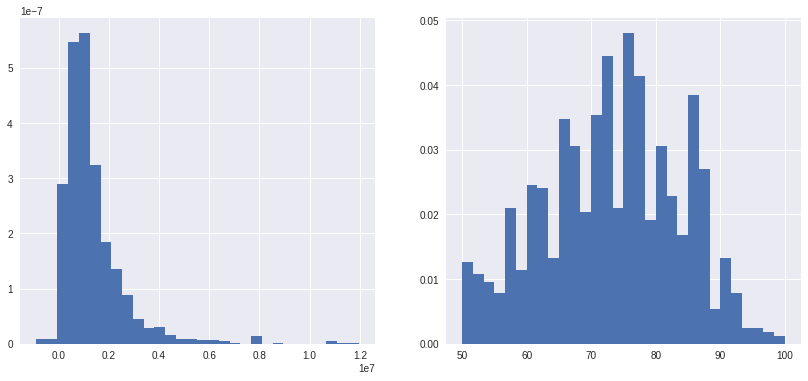

In [0]:
from matplotlib import pyplot as plt

init_invest_age = 50
retirement_age = 70
init_invest_amount = 150000
annu_invest_amount = 10000
annu_withdrawl_amount = 65000
interest_mean = 0.08
interest_std = 0.09

trials = 1000

final_balances=[]
final_ages=[]
for trial in range(trials):
    balance=init_invest_amount
    for year in range(init_invest_age,105):
        interest = np.random.normal(interest_mean,interest_std)
        balance+=balance*interest
        if np.random.random()<data[year]:
            final_balances.append(balance)
            final_ages.append(year)
            break
        if year<retirement_age:
            balance+=10000
        else:
            balance-=65000

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(final_balances, density=True, bins=30)
plt.subplot(1,2,2)
plt.hist(final_ages, density=True, bins=30)
plt.show()